**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.ranknorm.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.aggregate.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpra.tsv 


## Import data

In [6]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.ranknorm.overlap.starrmpra.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.34155069,0.7425860,0.4850237
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460


## Arrange table

In [7]:
lst = lst_dat_region_score_import 
lst = lapply(lst, function(dat){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
    vec_txt_assay = rev(vec_txt_assay)
    
    ### set the order of region
    tmp = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region = tmp$Region

    ### renew factor level based on the order
    dat = dat %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels=vec_txt_assay),
            Region = factor(Region, levels=vec_txt_region),
        )
    return(dat)
})

### assign and show
lst_dat_region_score_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.34155069,0.7425860,0.4850237
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.07952676,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.47689108,0.8007117,0.6684460


## Plotting style

In [8]:
THEME_TEXT = theme(
    plot.title   = element_text(size = 17, face = "bold"),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

## Explore: RankNorm across STARR/MPRA

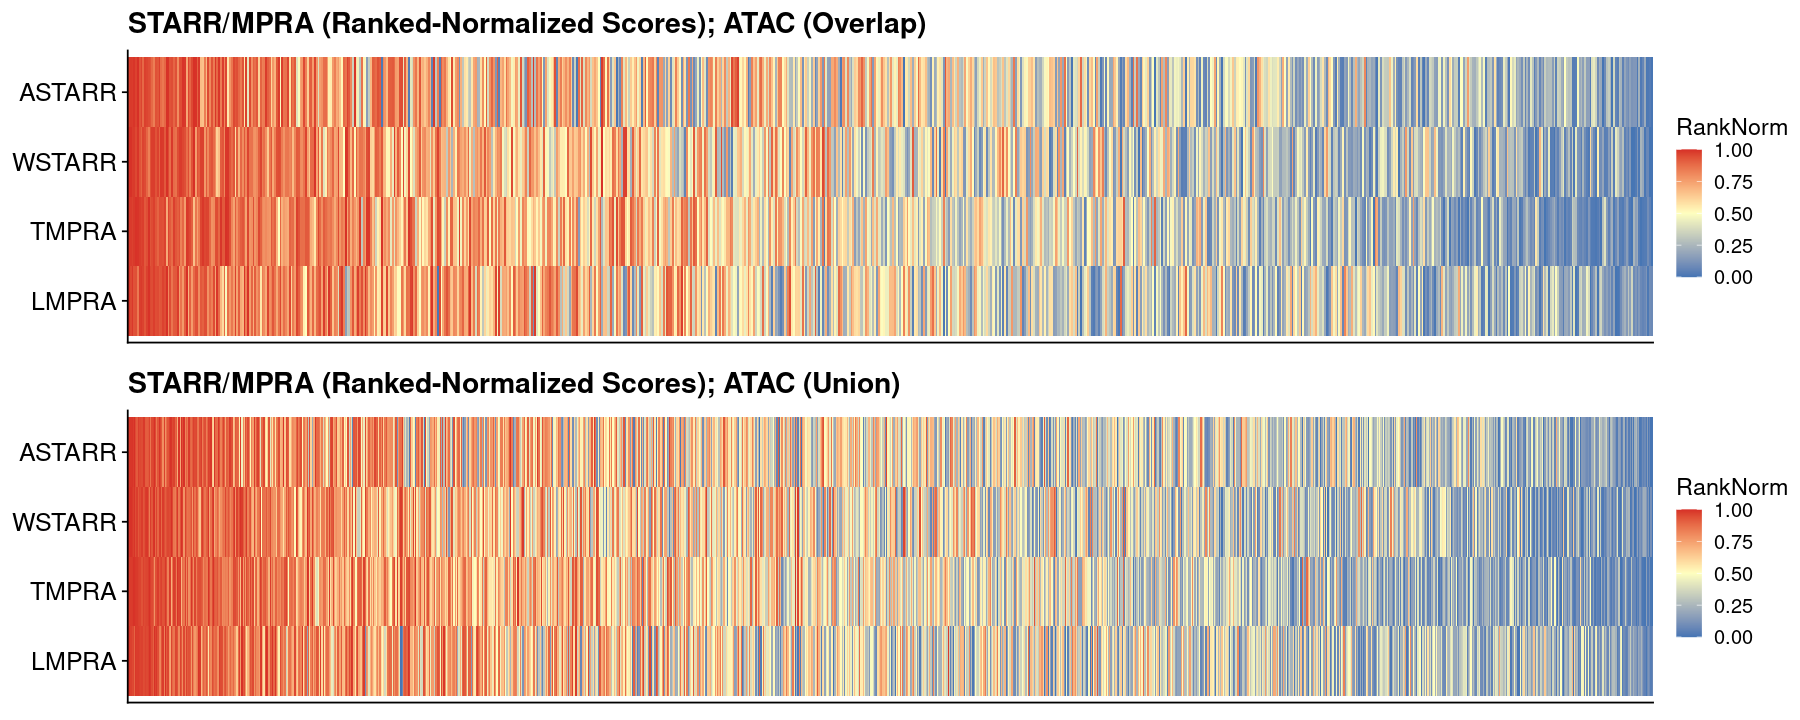

In [9]:
### set plot style
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Assay, fill=RankNorm)) +
        geom_tile() +
        labs(x="Open Chromatin Regions") +
        theme_cowplot() + 
        theme_text +
        theme_fill #+
        #theme_legend
    return(gpt)
})

### add title
idx = "fcc_astarr_macs_input_overlap"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Overlap)")
idx = "fcc_astarr_macs_input_union"
lst[[idx]] = lst[[idx]] + labs(title = "STARR/MPRA (Ranked-Normalized Scores); ATAC (Union)")

### assign and show
lst_gpt_region_score_starrmpra = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

**Choose the export plot**

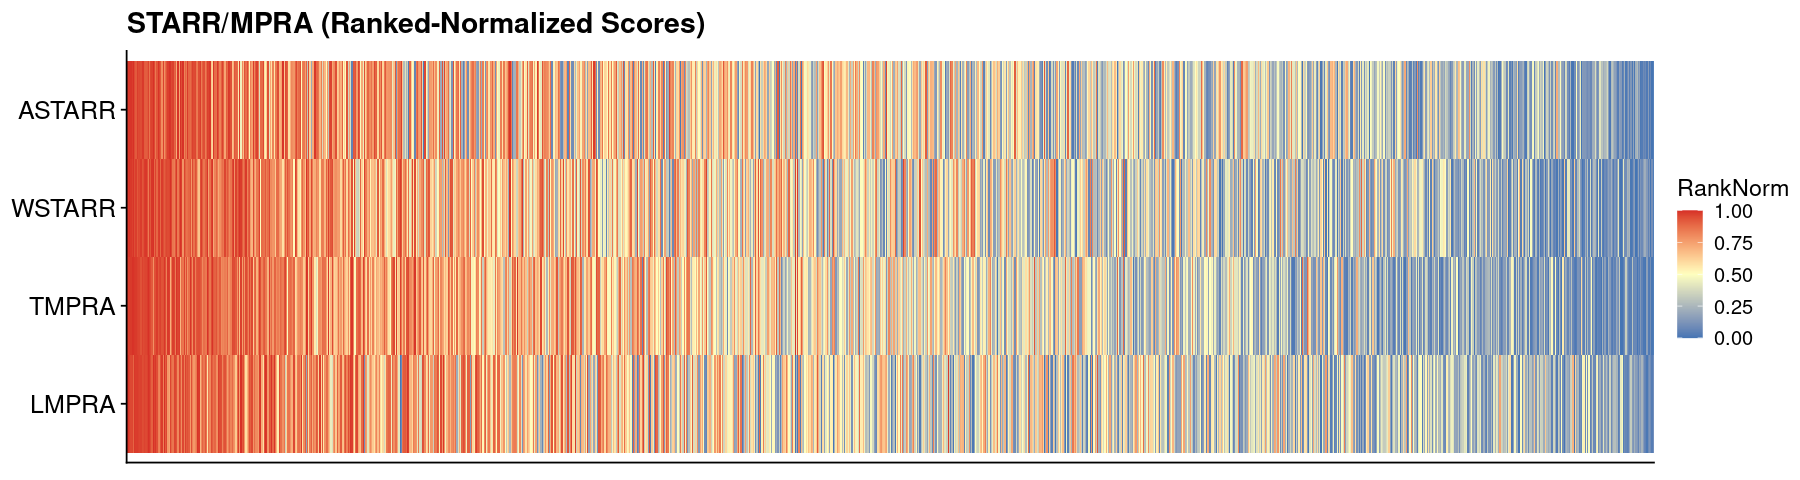

In [10]:
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_score_starrmpra
gpt = lst[[idx]]
gpt = gpt + labs(title = "STARR/MPRA (Ranked-Normalized Scores)")

### assign and show
gpt_export_ranknorm_starrmpra = gpt
options(repr.plot.height=4, repr.plot.width=15)
print(gpt)

## Export plots

In [11]:
plt_export = gpt_export_ranknorm_starrmpra
txt_export = "fig.region_coverage_fcc.ranknorm.overlap.starrmpra"
num_height = 4
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")